In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
pdf_complaint_df = pd.read_csv('data/officer_complaints_from_pdf.csv')
pdf_complaint_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117914 entries, 0 to 117913
Data columns (total 15 columns):
action                        113681 non-null object
appt_date                     117914 non-null object
closed_date                   117785 non-null object
complaint_date                117914 non-null object
cr_no                         117914 non-null object
final_category_code           117914 non-null object
final_complaint_category      117914 non-null object
finding                       83286 non-null object
incident_date                 117914 non-null object
initial_category_code         117914 non-null object
initial_complaint_category    117914 non-null object
key                           117914 non-null int64
location                      117914 non-null int64
officer_name                  117914 non-null object
page                          117914 non-null int64
dtypes: int64(3), object(12)
memory usage: 13.5+ MB


In [3]:
complaint_df = pd.read_excel('data/CR_AllRecords.xlsx')
complaint_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134683 entries, 0 to 134682
Data columns (total 12 columns):
NAME                          134683 non-null object
UNIT                          134528 non-null object
DATE_OF_APPOINTMENT           134486 non-null object
CR_NO                         134683 non-null int64
INITIAL_COMPLAINT_CATEGORY    134683 non-null object
FINAL_COMPLAINT_CATEGORY      134683 non-null object
INCIDENT_DATE                 134462 non-null object
COMPLAINT_DATE                134683 non-null object
CLOSED_DATE                   133294 non-null object
FINAL_FINDING                 134683 non-null object
ACTION_TAKEN                  134683 non-null int64
ACTION_DESCR                  134683 non-null object
dtypes: int64(2), object(10)
memory usage: 12.3+ MB


In [4]:
pdf_complaint_df.head()

,action,appt_date,closed_date,complaint_date,cr_no,final_category_code,final_complaint_category,finding,incident_date,initial_category_code,initial_complaint_category,key,location,officer_name,page
0,600-No Action Taken,08-Jun-1998,05-Jan-2001,22 Jun 2000,263295,05A,ARRESTEE - DURING ARREST,NS,21 Jun 2000,05A,ARRESTEE - DURING ARREST,1273,273,"PIWNICKI, RAYMOND",1
1,100-Reprimand,08-Jun-1998,05-Oct-2001,15 Jul 2000,263967,10M,INSUBORDINATION,SU,15 Jul 2000,10M,INSUBORDINATION,1314,314,"PIWNICKI, RAYMOND",1
2,600-No Action Taken,08-Jun-1998,20-Jan-2001,24 Aug 2000,265117,05A,ARRESTEE - DURING ARREST,NS,24 Aug 2000,05A,ARRESTEE - DURING ARREST,1356,356,"PIWNICKI, RAYMOND",1
3,600-No Action Taken,08-Jun-1998,21-May-2001,24 Oct 2000,266694,05N,WEAPON - UNNECESSARY DISPLAY OF,NS,13 Aug 2000,05N,WEAPON - UNNECESSARY DISPLAY OF,1398,398,"PIWNICKI, RAYMOND",1
4,600-No Action Taken,08-Jun-1998,24-Oct-2001,03 Nov 2000,266986,05A,ARRESTEE - DURING ARREST,UN,02 Nov 2000,05A,ARRESTEE - DURING ARREST,1440,440,"PIWNICKI, RAYMOND",1


In [5]:
complaint_df.head()

,NAME,UNIT,DATE_OF_APPOINTMENT,CR_NO,INITIAL_COMPLAINT_CATEGORY,FINAL_COMPLAINT_CATEGORY,INCIDENT_DATE,COMPLAINT_DATE,CLOSED_DATE,FINAL_FINDING,ACTION_TAKEN,ACTION_DESCR
0,"ABBATE, ANTHONY G",011,05-DEC-1994,237004,05A ARRESTEE - DURING ARREST,05B ARRESTEE - DURING ARREST,21-MAY-1997,21-MAY-1997,25-MAY-1999,UN,600,NO ACTION TAKEN
1,"ABBATE, ANTHONY G",011,05-DEC-1994,258124,04E PRISONERS PROPERTY - INVENTORY/RECEIPT,04E PRISONERS PROPERTY - INVENTORY/RECEIPT,19-NOV-1999,20-NOV-1999,07-DEC-2000,NS,600,NO ACTION TAKEN
2,"ABBATE, CARMEL G",641,06-JAN-1969,190369,03G MISCELLANEOUS,03G MISCELLANEOUS,11-FEB-1992,11-FEB-1992,09-APR-1992,UN,600,NO ACTION TAKEN
3,"ABBATE, CARMEL G",640,06-JAN-1969,210426,10V INVENTORY PROCEDURES,04E INVENTORY PROCEDURES,30-JUL-1994,14-JUL-1994,01-DEC-1994,NS,600,NO ACTION TAKEN
4,"ABBATE, CARMEL G",640,06-JAN-1969,219424,09J MISCELLANEOUS,05A MISCELLANEOUS,12-JUL-1995,19-JUL-1995,23-JAN-1996,NS,600,NO ACTION TAKEN


In [6]:
# First converting all dates to uppercase with dashes
pdf_complaint_df['appt_date'] = pdf_complaint_df['appt_date'].str.upper()
pdf_complaint_df.head()

,action,appt_date,closed_date,complaint_date,cr_no,final_category_code,final_complaint_category,finding,incident_date,initial_category_code,initial_complaint_category,key,location,officer_name,page
0,600-No Action Taken,08-JUN-1998,05-Jan-2001,22 Jun 2000,263295,05A,ARRESTEE - DURING ARREST,NS,21 Jun 2000,05A,ARRESTEE - DURING ARREST,1273,273,"PIWNICKI, RAYMOND",1
1,100-Reprimand,08-JUN-1998,05-Oct-2001,15 Jul 2000,263967,10M,INSUBORDINATION,SU,15 Jul 2000,10M,INSUBORDINATION,1314,314,"PIWNICKI, RAYMOND",1
2,600-No Action Taken,08-JUN-1998,20-Jan-2001,24 Aug 2000,265117,05A,ARRESTEE - DURING ARREST,NS,24 Aug 2000,05A,ARRESTEE - DURING ARREST,1356,356,"PIWNICKI, RAYMOND",1
3,600-No Action Taken,08-JUN-1998,21-May-2001,24 Oct 2000,266694,05N,WEAPON - UNNECESSARY DISPLAY OF,NS,13 Aug 2000,05N,WEAPON - UNNECESSARY DISPLAY OF,1398,398,"PIWNICKI, RAYMOND",1
4,600-No Action Taken,08-JUN-1998,24-Oct-2001,03 Nov 2000,266986,05A,ARRESTEE - DURING ARREST,UN,02 Nov 2000,05A,ARRESTEE - DURING ARREST,1440,440,"PIWNICKI, RAYMOND",1


In [7]:
pdf_complaint_df['complaint_date'] = pdf_complaint_df['complaint_date'].str.replace(' ', '-').str.upper()
pdf_complaint_df['closed_date'] = pdf_complaint_df['closed_date'].str.replace(' ', '-').str.upper()
pdf_complaint_df['incident_date'] = pdf_complaint_df['incident_date'].str.replace(' ', '-').str.upper()
pdf_complaint_df.head()

,action,appt_date,closed_date,complaint_date,cr_no,final_category_code,final_complaint_category,finding,incident_date,initial_category_code,initial_complaint_category,key,location,officer_name,page
0,600-No Action Taken,08-JUN-1998,05-JAN-2001,22-JUN-2000,263295,05A,ARRESTEE - DURING ARREST,NS,21-JUN-2000,05A,ARRESTEE - DURING ARREST,1273,273,"PIWNICKI, RAYMOND",1
1,100-Reprimand,08-JUN-1998,05-OCT-2001,15-JUL-2000,263967,10M,INSUBORDINATION,SU,15-JUL-2000,10M,INSUBORDINATION,1314,314,"PIWNICKI, RAYMOND",1
2,600-No Action Taken,08-JUN-1998,20-JAN-2001,24-AUG-2000,265117,05A,ARRESTEE - DURING ARREST,NS,24-AUG-2000,05A,ARRESTEE - DURING ARREST,1356,356,"PIWNICKI, RAYMOND",1
3,600-No Action Taken,08-JUN-1998,21-MAY-2001,24-OCT-2000,266694,05N,WEAPON - UNNECESSARY DISPLAY OF,NS,13-AUG-2000,05N,WEAPON - UNNECESSARY DISPLAY OF,1398,398,"PIWNICKI, RAYMOND",1
4,600-No Action Taken,08-JUN-1998,24-OCT-2001,03-NOV-2000,266986,05A,ARRESTEE - DURING ARREST,UN,02-NOV-2000,05A,ARRESTEE - DURING ARREST,1440,440,"PIWNICKI, RAYMOND",1


In [8]:
pdf_complaint_df['action'] = pdf_complaint_df['action'].astype(str)

In [9]:
pdf_complaint_df['ACTION_TAKEN'] = pdf_complaint_df['action'].apply(lambda x: x.split('-')[0] if '-' in x else '')
pdf_complaint_df['ACTION_DESCR'] = pdf_complaint_df['action'].apply(lambda x: x.split('-')[1] if '-' in x else '')
pdf_complaint_df.head()

,action,appt_date,closed_date,complaint_date,cr_no,final_category_code,final_complaint_category,finding,incident_date,initial_category_code,initial_complaint_category,key,location,officer_name,page,ACTION_TAKEN,ACTION_DESCR
0,600-No Action Taken,08-JUN-1998,05-JAN-2001,22-JUN-2000,263295,05A,ARRESTEE - DURING ARREST,NS,21-JUN-2000,05A,ARRESTEE - DURING ARREST,1273,273,"PIWNICKI, RAYMOND",1,600,No Action Taken
1,100-Reprimand,08-JUN-1998,05-OCT-2001,15-JUL-2000,263967,10M,INSUBORDINATION,SU,15-JUL-2000,10M,INSUBORDINATION,1314,314,"PIWNICKI, RAYMOND",1,100,Reprimand
2,600-No Action Taken,08-JUN-1998,20-JAN-2001,24-AUG-2000,265117,05A,ARRESTEE - DURING ARREST,NS,24-AUG-2000,05A,ARRESTEE - DURING ARREST,1356,356,"PIWNICKI, RAYMOND",1,600,No Action Taken
3,600-No Action Taken,08-JUN-1998,21-MAY-2001,24-OCT-2000,266694,05N,WEAPON - UNNECESSARY DISPLAY OF,NS,13-AUG-2000,05N,WEAPON - UNNECESSARY DISPLAY OF,1398,398,"PIWNICKI, RAYMOND",1,600,No Action Taken
4,600-No Action Taken,08-JUN-1998,24-OCT-2001,03-NOV-2000,266986,05A,ARRESTEE - DURING ARREST,UN,02-NOV-2000,05A,ARRESTEE - DURING ARREST,1440,440,"PIWNICKI, RAYMOND",1,600,No Action Taken


In [10]:
pdf_complaint_df['INITIAL_COMPLAINT_CATEGORY'] = pdf_complaint_df['initial_category_code'] + ' ' + pdf_complaint_df['initial_complaint_category']
pdf_complaint_df['FINAL_COMPLAINT_CATEGORY'] = pdf_complaint_df['final_category_code'] + ' ' + pdf_complaint_df['final_complaint_category']
pdf_complaint_df.head()

,action,appt_date,closed_date,complaint_date,cr_no,final_category_code,final_complaint_category,finding,incident_date,initial_category_code,initial_complaint_category,key,location,officer_name,page,ACTION_TAKEN,ACTION_DESCR,INITIAL_COMPLAINT_CATEGORY,FINAL_COMPLAINT_CATEGORY
0,600-No Action Taken,08-JUN-1998,05-JAN-2001,22-JUN-2000,263295,05A,ARRESTEE - DURING ARREST,NS,21-JUN-2000,05A,ARRESTEE - DURING ARREST,1273,273,"PIWNICKI, RAYMOND",1,600,No Action Taken,05A ARRESTEE - DURING ARREST,05A ARRESTEE - DURING ARREST
1,100-Reprimand,08-JUN-1998,05-OCT-2001,15-JUL-2000,263967,10M,INSUBORDINATION,SU,15-JUL-2000,10M,INSUBORDINATION,1314,314,"PIWNICKI, RAYMOND",1,100,Reprimand,10M INSUBORDINATION,10M INSUBORDINATION
2,600-No Action Taken,08-JUN-1998,20-JAN-2001,24-AUG-2000,265117,05A,ARRESTEE - DURING ARREST,NS,24-AUG-2000,05A,ARRESTEE - DURING ARREST,1356,356,"PIWNICKI, RAYMOND",1,600,No Action Taken,05A ARRESTEE - DURING ARREST,05A ARRESTEE - DURING ARREST
3,600-No Action Taken,08-JUN-1998,21-MAY-2001,24-OCT-2000,266694,05N,WEAPON - UNNECESSARY DISPLAY OF,NS,13-AUG-2000,05N,WEAPON - UNNECESSARY DISPLAY OF,1398,398,"PIWNICKI, RAYMOND",1,600,No Action Taken,05N WEAPON - UNNECESSARY DISPLAY OF,05N WEAPON - UNNECESSARY DISPLAY OF
4,600-No Action Taken,08-JUN-1998,24-OCT-2001,03-NOV-2000,266986,05A,ARRESTEE - DURING ARREST,UN,02-NOV-2000,05A,ARRESTEE - DURING ARREST,1440,440,"PIWNICKI, RAYMOND",1,600,No Action Taken,05A ARRESTEE - DURING ARREST,05A ARRESTEE - DURING ARREST


In [11]:
pdf_complaint_df['UNIT'] = ''

In [12]:
pdf_complaint_df.to_csv('data/officer_complaint_merge_in_progress.csv',index=False)

In [13]:
pdf_complaint_merge = pdf_complaint_df[['officer_name', 'UNIT', 'appt_date', 'cr_no', 'INITIAL_COMPLAINT_CATEGORY',
                                        'FINAL_COMPLAINT_CATEGORY', 'incident_date', 'complaint_date', 'closed_date',
                                        'finding', 'ACTION_TAKEN', 'ACTION_DESCR']].copy()
pdf_complaint_merge = pdf_complaint_merge.rename(columns={'officer_name': 'NAME', 'appt_date': 'DATE_OF_APPOINTMENT', 
                                                          'cr_no': 'CR_NO', 'incident_date': 'INCIDENT_DATE', 
                                                          'complaint_date': 'COMPLAINT_DATE', 'closed_date': 'CLOSED_DATE',
                                                          'finding': 'FINAL_FINDING'})
pdf_complaint_merge['ACTION_DESCR'] = pdf_complaint_merge['ACTION_DESCR'].str.upper()
pdf_complaint_merge.head()

,NAME,UNIT,DATE_OF_APPOINTMENT,CR_NO,INITIAL_COMPLAINT_CATEGORY,FINAL_COMPLAINT_CATEGORY,INCIDENT_DATE,COMPLAINT_DATE,CLOSED_DATE,FINAL_FINDING,ACTION_TAKEN,ACTION_DESCR
0,"PIWNICKI, RAYMOND",,08-JUN-1998,263295,05A ARRESTEE - DURING ARREST,05A ARRESTEE - DURING ARREST,21-JUN-2000,22-JUN-2000,05-JAN-2001,NS,600,NO ACTION TAKEN
1,"PIWNICKI, RAYMOND",,08-JUN-1998,263967,10M INSUBORDINATION,10M INSUBORDINATION,15-JUL-2000,15-JUL-2000,05-OCT-2001,SU,100,REPRIMAND
2,"PIWNICKI, RAYMOND",,08-JUN-1998,265117,05A ARRESTEE - DURING ARREST,05A ARRESTEE - DURING ARREST,24-AUG-2000,24-AUG-2000,20-JAN-2001,NS,600,NO ACTION TAKEN
3,"PIWNICKI, RAYMOND",,08-JUN-1998,266694,05N WEAPON - UNNECESSARY DISPLAY OF,05N WEAPON - UNNECESSARY DISPLAY OF,13-AUG-2000,24-OCT-2000,21-MAY-2001,NS,600,NO ACTION TAKEN
4,"PIWNICKI, RAYMOND",,08-JUN-1998,266986,05A ARRESTEE - DURING ARREST,05A ARRESTEE - DURING ARREST,02-NOV-2000,03-NOV-2000,24-OCT-2001,UN,600,NO ACTION TAKEN


In [14]:
pdf_complaint_merge.to_csv('data/officer_complaints_merge_format.csv',index=False)

In [15]:
combined_complaint_df = pd.concat([complaint_df, pdf_complaint_merge])
combined_complaint_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252597 entries, 0 to 117913
Data columns (total 12 columns):
NAME                          252597 non-null object
UNIT                          252442 non-null object
DATE_OF_APPOINTMENT           252400 non-null object
CR_NO                         252597 non-null object
INITIAL_COMPLAINT_CATEGORY    252597 non-null object
FINAL_COMPLAINT_CATEGORY      252597 non-null object
INCIDENT_DATE                 252376 non-null object
COMPLAINT_DATE                252597 non-null object
CLOSED_DATE                   251079 non-null object
FINAL_FINDING                 217969 non-null object
ACTION_TAKEN                  252597 non-null object
ACTION_DESCR                  252597 non-null object
dtypes: object(12)
memory usage: 25.1+ MB


In [16]:
combined_complaint_df.to_csv('data/combined_officer_complaints.csv',index=False)

In [17]:
combined_complaint_df['NAME_NO_INITIAL'] = combined_complaint_df['NAME'].apply(lambda x: x[:-2] if re.match('.*\s\w$', x) is not None else x)
combined_complaint_df.head()

,NAME,UNIT,DATE_OF_APPOINTMENT,CR_NO,INITIAL_COMPLAINT_CATEGORY,FINAL_COMPLAINT_CATEGORY,INCIDENT_DATE,COMPLAINT_DATE,CLOSED_DATE,FINAL_FINDING,ACTION_TAKEN,ACTION_DESCR,NAME_NO_INITIAL
0,"ABBATE, ANTHONY G",011,05-DEC-1994,237004,05A ARRESTEE - DURING ARREST,05B ARRESTEE - DURING ARREST,21-MAY-1997,21-MAY-1997,25-MAY-1999,UN,600,NO ACTION TAKEN,"ABBATE, ANTHONY"
1,"ABBATE, ANTHONY G",011,05-DEC-1994,258124,04E PRISONERS PROPERTY - INVENTORY/RECEIPT,04E PRISONERS PROPERTY - INVENTORY/RECEIPT,19-NOV-1999,20-NOV-1999,07-DEC-2000,NS,600,NO ACTION TAKEN,"ABBATE, ANTHONY"
2,"ABBATE, CARMEL G",641,06-JAN-1969,190369,03G MISCELLANEOUS,03G MISCELLANEOUS,11-FEB-1992,11-FEB-1992,09-APR-1992,UN,600,NO ACTION TAKEN,"ABBATE, CARMEL"
3,"ABBATE, CARMEL G",640,06-JAN-1969,210426,10V INVENTORY PROCEDURES,04E INVENTORY PROCEDURES,30-JUL-1994,14-JUL-1994,01-DEC-1994,NS,600,NO ACTION TAKEN,"ABBATE, CARMEL"
4,"ABBATE, CARMEL G",640,06-JAN-1969,219424,09J MISCELLANEOUS,05A MISCELLANEOUS,12-JUL-1995,19-JUL-1995,23-JAN-1996,NS,600,NO ACTION TAKEN,"ABBATE, CARMEL"


In [18]:
# Need to manually convert CR_NO to string when checking for uniques because first dataset has it as int64
combined_complaint_df['CR_NO'] = combined_complaint_df['CR_NO'].astype(str)

In [19]:
combined_complaint_df.shape

(252597, 13)

In [26]:
complaint_drop_dupes = combined_complaint_df.drop_duplicates(subset=['NAME_NO_INITIAL', 'CR_NO'])
complaint_drop_dupes.to_csv('data/combined_complaints_dedupe.csv',index=False)

In [66]:
combined_complaint_df.to_csv('data/combined_officer_complaints_no_initials.csv',index=False)

In [27]:
combined_complaint_df['NAME'].unique().shape

In [28]:
complaint_df['NAME'].unique().shape

(18907,)

In [29]:
pdf_complaint_merge['NAME'].unique().shape

(14839,)

In [30]:
combined_complaint_df['NAME_NO_INITIAL'].unique().shape

(23166,)

In [31]:
complaints_by_officer = combined_complaint_df.loc[combined_complaint_df['CR_NO'] != '***'].groupby(
    ['NAME_NO_INITIAL','DATE_OF_APPOINTMENT'])['CR_NO'].nunique()
complaints_by_officer.head()

NAME_NO_INITIAL  DATE_OF_APPOINTMENT
AARON, JEFFERY   26-SEP-2005            5
AARON, KARINA    26-SEP-2005            8
ABBATE, ANTHONY  05-DEC-1994            6
ABBATE, CARMEL   06-JAN-1969            6
ABBATE, CARMEN   16-OCT-1954            4
Name: CR_NO, dtype: int64

In [32]:
top_100_officers = complaints_by_officer.sort_values(ascending=False)[:100]
top_100_officers[:15]

NAME_NO_INITIAL     DATE_OF_APPOINTMENT
FINNIGAN, JEROME    05-DEC-1988            157
PARKER, JOE         18-NOV-1985            130
MAY, EDWARD         26-APR-1976            130
TOUSSAS, CHARLES    19-JAN-1981            117
OSBORN, KEVIN       02-JAN-1992            116
EVANS, GLENN        14-JUL-1986            115
ZELITZKY, ADAM      05-DEC-1988            107
TURBYVILLE, JEROME  02-MAY-1994            100
GRUBBS, JAMES       29-SEP-1980             98
JACKSON, GREGORY    27-FEB-1991             97
CLAYTON, MAURICE    22-OCT-1973             97
PIWNICKI, RAYMOND   08-JUN-1998             93
WOJTAN, KENNETH     13-DEC-1993             93
MATTHEWS, TAMARA    02-MAY-1994             92
JONES, BRODERICK    05-MAY-1997             91
Name: CR_NO, dtype: int64

In [33]:
complaints_by_officer_pdf = pdf_complaint_merge.groupby(['NAME','DATE_OF_APPOINTMENT'])['CR_NO'].count()
complaints_by_officer_pdf = complaints_by_officer_pdf.sort_values(ascending=False)
complaints_by_officer_pdf[:15]

NAME               DATE_OF_APPOINTMENT
FINNIGAN, JEROME   05-DEC-1988            88
PIWNICKI, RAYMOND  08-JUN-1998            88
CAMPBELL, SEAN     13-APR-1998            83
WOJTAN, KENNETH    13-DEC-1993            79
HERRERA, KEITH     19-JUN-2000            78
OSBORN, KEVIN      02-JAN-1992            78
CONNOLLY, MICHAEL  02-SEP-1997            77
MATTHEWS, TAMARA   02-MAY-1994            75
ANDERSON, MAURICE  07-JUL-1997            71
FLAGG, COREY       04-NOV-1996            70
COLEMAN, RONALD    13-DEC-1999            70
CAREY, THOMAS      05-JUN-1995            69
SCHULZ, ANTHONY    04-NOV-1996            69
SMITH, ROBERT      02-DEC-1996            69
MARKOVICH, NENAD   04-NOV-1996            69
Name: CR_NO, dtype: int64

In [34]:
combined_complaint_df.loc[combined_complaint_df['CR_NO'] != '***', 'CR_NO'].nunique()

125663

In [35]:
dates_by_complaints = combined_complaint_df.loc[combined_complaint_df['CR_NO'] != '***'].groupby(
    ['COMPLAINT_DATE'])['CR_NO'].nunique()
dates_by_complaints.head()

COMPLAINT_DATE
01-APR-1980     1
01-APR-1985     1
01-APR-1986     1
01-APR-1987     1
01-APR-1991    19
Name: CR_NO, dtype: int64

In [36]:
dates_by_complaints = pd.DataFrame(dates_by_complaints).reset_index()
dates_by_complaints.head()

,COMPLAINT_DATE,CR_NO
0,01-APR-1980,1
1,01-APR-1985,1
2,01-APR-1986,1
3,01-APR-1987,1
4,01-APR-1991,19


In [37]:
dates_by_complaints['COMPLAINT_DATE'] = pd.to_datetime(dates_by_complaints['COMPLAINT_DATE'])
dates_by_complaints.head()

,COMPLAINT_DATE,CR_NO
0,1980-04-01,1
1,1985-04-01,1
2,1986-04-01,1
3,1987-04-01,1
4,1991-04-01,19


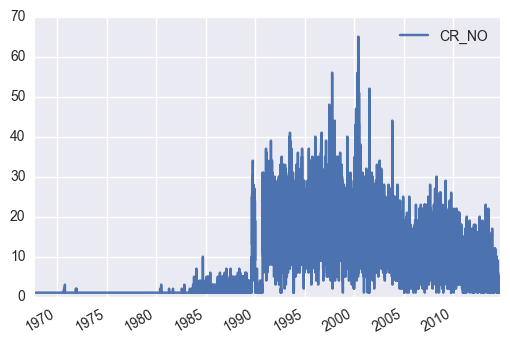

In [38]:
dates_by_complaints = dates_by_complaints.set_index(pd.DatetimeIndex(dates_by_complaints['COMPLAINT_DATE']))
dates_by_complaints.plot(y='CR_NO')

In [39]:
months_by_complaints = dates_by_complaints['CR_NO'].resample('M').sum()
months_by_complaints.head()

1967-10-31    1.0
1967-11-30    NaN
1967-12-31    NaN
1968-01-31    NaN
1968-02-29    NaN
Freq: M, Name: CR_NO, dtype: float64

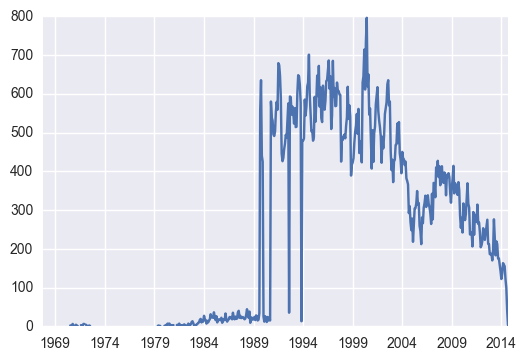

In [40]:
months_by_complaints.plot()